# Load Data

In [1]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("LakeData.csv", sep=",")
#Remove Unnecessary
df_data = df.drop(['OBJECTID_1', 'Continent'], axis=1)

#Remove Samples with no lake names (remove wetland data)
df_data['Lake_name'] = df_data['Lake_name'].replace(' ', np.nan)

#Make the absolute value sof latitude just ot get the distance 
df_data['Pour_lat'] = df_data['Pour_lat'].abs()
df_data = df_data.sort_values(by='Pour_lat')

#Remove the Outlier (Due to Caspian and Lake Victoria) -------------------------------------------
max_drop = df_data['Total CO2-eq feedback (t/d)'].idxmax()

# Remove the row using its index
df_data = df_data.drop(max_drop)

max_drop2 = df_data['Total CO2-eq feedback (t/d)'].idxmax()
df_data = df_data.drop(max_drop2)

#Drop the NA
df_final = df_data.dropna(subset=['Lake_name'])
print(df_final)

              Lake_name    Lake_area   Pour_long   Pour_lat  \
1021             George   260.700012   30.161083   0.068246   
846              Edward  2241.979980   29.602017   0.140928   
112205         Semajang   104.559998  116.534009   0.245526   
9469          Melintang    87.959999  116.406665   0.281250   
728     Danau Manindjau    86.940002  100.149755   0.292147   
...                 ...          ...         ...        ...   
1622             Kokora   158.809998  100.881354  72.990448   
109207      Portnyagino   375.480011  106.480208  74.179261   
1649        Kungasalakh   259.709992  106.983011  74.541049   
113257           Taymyr  4908.660156  100.089583  75.220969   
1186              Hazen   547.210022  -70.439583  81.797917   

        CO2-eq feedback capacity (g/m2d)  Total CO2-eq feedback (t/d)  
1021                            9.224104                  2404.723936  
846                             9.215375                 20660.685250  
112205                     

# Data Description
1. Characterize the mean, median and standard deviation of all variables in your dataset relevant to your hypothesis.
2. Create Histograms of each relevant variable.


In [3]:
# Variables that will be Analyzed: Lake Area, Latitude, Total CO2-eq feedback (t/d)

#Lake Area
area_mean = df_final['Lake_area'].mean()
area_median = df_final['Lake_area'].median()
area_std = df_final['Lake_area'].std()

#Latitude
lat_mean = df_final['Pour_lat'].mean()
lat_median = df_final['Pour_lat'].median()
lat_std = df_final['Pour_lat'].std()

#Total CO2
total_mean = df_final['Total CO2-eq feedback (t/d)'].mean()
total_median = df_final['Total CO2-eq feedback (t/d)'].median()
total_std = df_final['Total CO2-eq feedback (t/d)'].std()


#Print Final Results

print(f'Lake area\nMean: {area_mean} m^2\nMedian: {area_median} m^2\nStandard Deviation: {area_std} m^2\n')
print(f'Latitude\nMean: {lat_mean} degrees\nMedian: {lat_median} degrees\nStandard Deviation: {lat_std} degrees\n')
print(f'Total CO2 Feedback\nMean: {total_mean} t/d\nMedian: {total_median} t/d\nStandard Deviation: {total_std} t/d')

Lake area
Mean: 419.1718431033958 m^2
Median: 42.15000153 m^2
Standard Deviation: 2751.2975626471925 m^2

Latitude
Mean: 40.784208668102025 degrees
Median: 39.659702 degrees
Standard Deviation: 13.767640907197663 degrees

Total CO2 Feedback
Mean: 1750.9477718749713 t/d
Median: 138.499051 t/d
Standard Deviation: 12000.614437571574 t/d


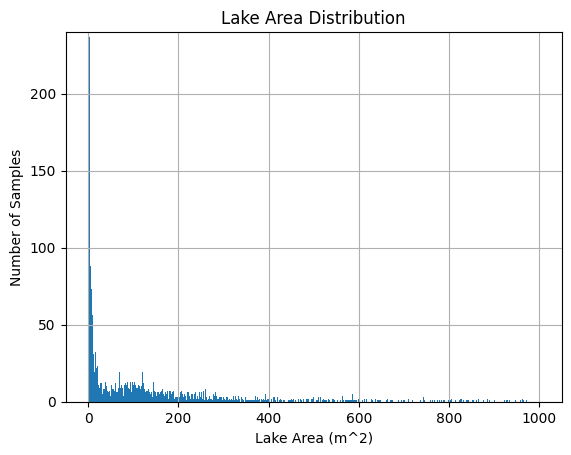

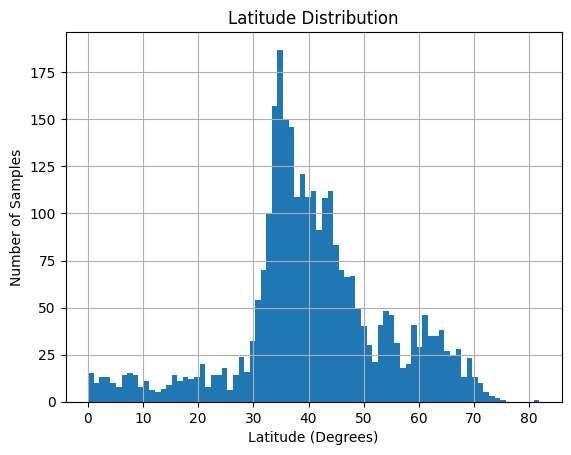

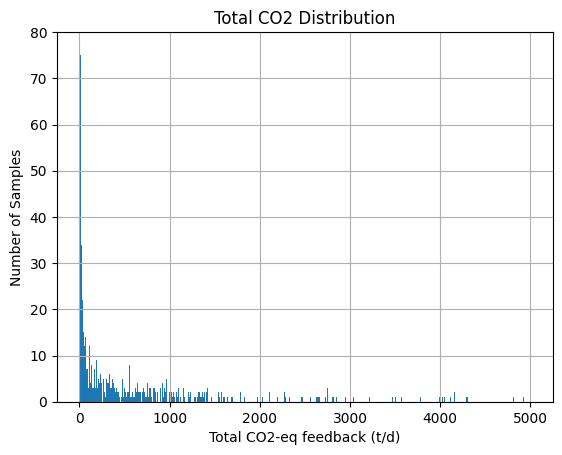

In [4]:
#Create Histograms of each Relevant Variables
#Lake Area
df_final.hist(column ="Lake_area", range = [0,1000], bins = 600)
plt.title("Lake Area Distribution")
plt.xlabel("Lake Area (m^2)")
plt.ylabel("Number of Samples")
plt.ylim(0,240)

#Latitude
df_final.hist(column ="Pour_lat", bins = 81)
plt.title("Latitude Distribution")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Number of Samples")


#Total CO2
df_final.hist(column ="Total CO2-eq feedback (t/d)", range = [0,5000], bins = 2000)
plt.title("Total CO2 Distribution")
plt.xlabel("Total CO2-eq feedback (t/d)")
plt.ylabel("Number of Samples")

plt.ylim(0,80)

plt.show()

# Correlation
1. Calculate Pearson and Spearman Correlation Coefficients between key variables relevant to your hypothesis.
2. Conduct Linear regression on the above variable sets.
3. Generate scatter plots of real data with linear regression lines overlaid

In [5]:
###Pearson and Spearman
#Lake area vs Total CO2

pearson1 = df_final["Lake_area"].corr(df["Total CO2-eq feedback (t/d)"], method="pearson")
spearman1 = df_final["Lake_area"].corr(df["Total CO2-eq feedback (t/d)"], method="spearman")

print(f"Lake Area vs Total CO2:\nPearson: {pearson1}\nSpearman: {spearman1}\n")

# Latitude vs Total CO2
pearson2 = df_final["Pour_lat"].corr(df["Total CO2-eq feedback (t/d)"], method="pearson")
spearman2 = df_final["Pour_lat"].corr(df["Total CO2-eq feedback (t/d)"], method="spearman")
print(f"Latitude vs Total CO2:\nPearson: {pearson2}\nSpearman: {spearman2}\n")


Lake Area vs Total CO2:
Pearson: 0.9252968343358986
Spearman: 0.9735305258932389

Latitude vs Total CO2:
Pearson: -0.08293629299853143
Spearman: 0.06155511082692872



In [6]:
###Linear Regression 

#Lake Area vs Total Co2
print("Lake Area vs Total CO2")
LSLR1 = stats.linregress(df_final["Lake_area"], df_final["Total CO2-eq feedback (t/d)"]) 

#print(LSLR1)
#print()
#print("y =", str(LSLR1.slope) + "x +", str(LSLR1.intercept), ": R2 = "+str(LSLR1.rvalue**2)) 
print("y =", str(np.round(LSLR1.slope, decimals=3)) + "x +", str(np.round(LSLR1.intercept,decimals=3)), ": R2 = "+str(np.round(LSLR1.rvalue**2,decimals=3)),"\n")

# Latitude vs Total CO2
print("Latitude vs Total CO2")
LSLR2 = stats.linregress(df_final["Pour_lat"], df_final["Total CO2-eq feedback (t/d)"]) 

#print(LSLR2)
#print()
#print("y =", str(LSLR2.slope) + "x +", str(LSLR2.intercept), ": R2 = "+str(LSLR2.rvalue**2)) 
print("y =", str(np.round(LSLR2.slope, decimals=3)) + "x +", str(np.round(LSLR2.intercept,decimals=3)), ": R2 = "+str(np.round(LSLR2.rvalue**2,decimals=3)))


Lake Area vs Total CO2
y = 4.036x + 59.186 : R2 = 0.856 

Latitude vs Total CO2
y = -72.292x + 4699.308 : R2 = 0.007


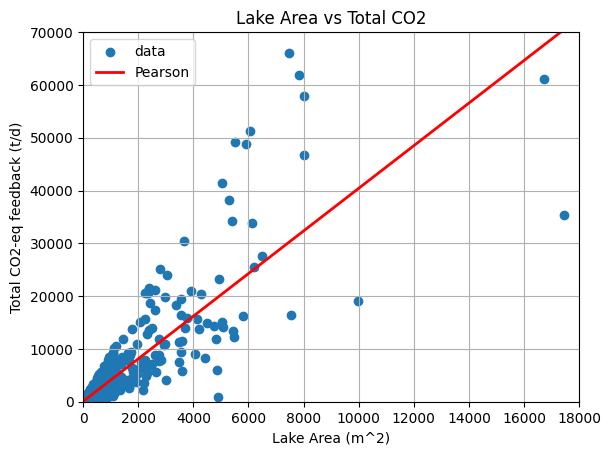

In [16]:
###Scatterplot and Linear Regression
fig, ax = plt.subplots()

#Lake Area vs Total CO2
plt.scatter(df_final["Lake_area"], df_final['Total CO2-eq feedback (t/d)'])
plt.title(f"Lake Area vs Total CO2")

#X - Axis 
ax.set_xlabel("Lake Area (m^2)")
plt.xlim(0,18000)

# Y - Axis
ax.set_ylabel("Total CO2-eq feedback (t/d)")
plt.ylim(0,70000)
plt.grid()

#Line regression (y = 4.88x + -199.045)
linR=scipy.stats.linregress(df_final["Lake_area"], df_final['Total CO2-eq feedback (t/d)'])

### New Trick, plot equation
x=[0, 100000]
y=[0, 70000]

x[0]=df["Total CO2-eq feedback (t/d)"].min()
y[0]=(linR.slope*x[0])+linR.intercept
x[1]=df["Total CO2-eq feedback (t/d)"].max()
y[1]=(linR.slope*x[1])+linR.intercept

plt.plot(x,y,lw=2,c="red")
ax.legend(["data","Pearson"])


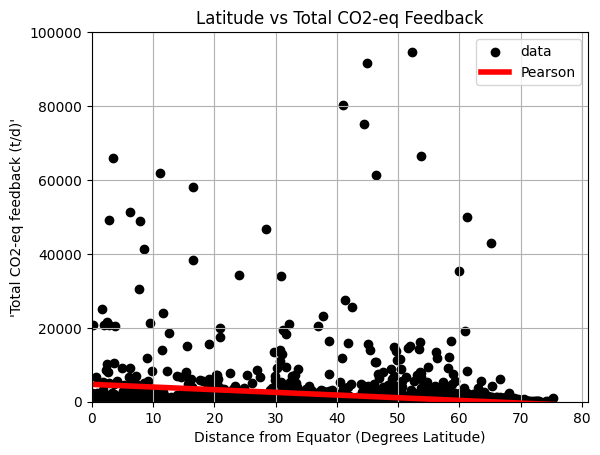

In [17]:
###Scatterplot and Linear Regression
fig, ax = plt.subplots()

#Lake Area vs Total CO2
plt.scatter(df_final['Pour_lat'], df_final['Total CO2-eq feedback (t/d)'], color = "black")
plt.title(f"Latitude vs Total CO2-eq Feedback")

#X - Axis 
ax.set_xlabel("Distance from Equator (Degrees Latitude)")
plt.xlim(0,81)

# Y - Axis
ax.set_ylabel("'Total CO2-eq feedback (t/d)'")
plt.ylim(0, 100000)
plt.grid()

#Line regression (y = 4.88x + -199.045)
linR=scipy.stats.linregress(df_final["Pour_lat"], df_final['Total CO2-eq feedback (t/d)'])

### New Trick, plot equation
x=[0, 100]
y=[0, 100]

x[0]=df["Total CO2-eq feedback (t/d)"].min()
y[0]=(linR.slope*x[0])+linR.intercept
x[1]=df["Total CO2-eq feedback (t/d)"].max()
y[1]=(linR.slope*x[1])+linR.intercept

plt.plot(x,y, lw=4, c="red")
ax.legend(["data","Pearson"])

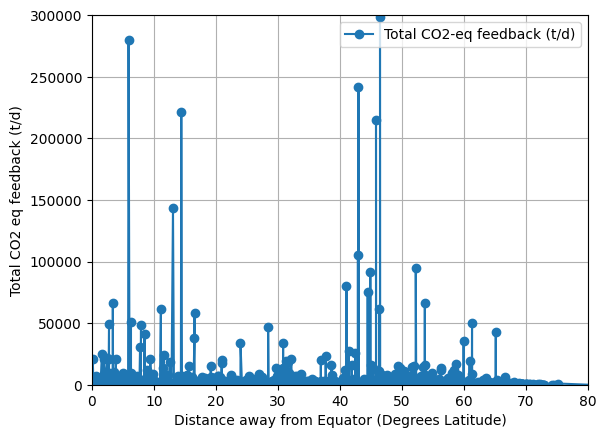

In [9]:
df_final.plot(x='Pour_lat', y='Total CO2-eq feedback (t/d)', marker="o")
#X-Axis 

plt.xlabel("Distance away from Equator (Degrees Latitude)")
plt.xlim(0,80)

#Y-Axis
plt.ylabel("Total CO2 eq feedback (t/d)")
plt.ylim(0,300000)
plt.grid()

# Dimensionality reduction

1. Conduct Principle Components Analysis using all quantitative variables in your data set for across all samples.
2. Extract principle component weights and plot using a bar chart.
3. Visualize your data on PC1 and PC2. Color code data points by relevant categories.

In [10]:
#Remove Lake Names as it is a qualitative variable variables for simplicity
df_noname = df_final.drop(['Lake_name'], axis=1)
print(df_noname)

          Lake_area   Pour_long   Pour_lat  CO2-eq feedback capacity (g/m2d)  \
1021     260.700012   30.161083   0.068246                          9.224104   
846     2241.979980   29.602017   0.140928                          9.215375   
112205   104.559998  116.534009   0.245526                          9.202812   
9469      87.959999  116.406665   0.281250                          9.198522   
728       86.940002  100.149755   0.292147                          9.197213   
...             ...         ...        ...                               ...   
1622     158.809998  100.881354  72.990448                          0.466147   
109207   375.480011  106.480208  74.179261                          0.323371   
1649     259.709992  106.983011  74.541049                          0.279920   
113257  4908.660156  100.089583  75.220969                          0.198262   
1186     547.210022  -70.439583  81.797917                         -0.591630   

        Total CO2-eq feedback (t/d)  
1

In [11]:
#Remove the variable we are mainly looking at
df_pca = df_noname.drop('Total CO2-eq feedback (t/d)', axis=1)
print(df_pca)

          Lake_area   Pour_long   Pour_lat  CO2-eq feedback capacity (g/m2d)
1021     260.700012   30.161083   0.068246                          9.224104
846     2241.979980   29.602017   0.140928                          9.215375
112205   104.559998  116.534009   0.245526                          9.202812
9469      87.959999  116.406665   0.281250                          9.198522
728       86.940002  100.149755   0.292147                          9.197213
...             ...         ...        ...                               ...
1622     158.809998  100.881354  72.990448                          0.466147
109207   375.480011  106.480208  74.179261                          0.323371
1649     259.709992  106.983011  74.541049                          0.279920
113257  4908.660156  100.089583  75.220969                          0.198262
1186     547.210022  -70.439583  81.797917                         -0.591630

[3019 rows x 4 columns]


In [12]:
#PCA
### Rescaling our Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

#Tranform Data
pca = PCA(n_components=0.99) # To retain 99% of variance
PCs = pca.fit_transform(scaled_data)

print(pca.explained_variance_ratio_)

[0.5209539  0.25030953 0.22873657]


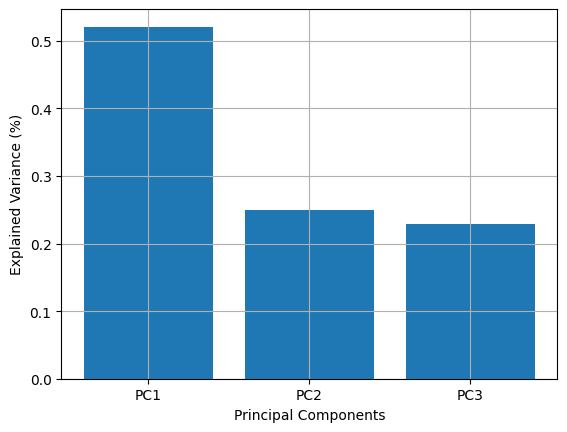

In [13]:
explained = pca.explained_variance_ratio_
plt.grid()
#Label Each Principle components
x_labels = ["PC1", "PC2", "PC3"]

x = [0,1,2]

plt.bar(x, explained)
plt.xticks(x, x_labels)
plt.ylabel("Explained Variance (%)")
plt.xlabel("Principal Components")
plt.show()

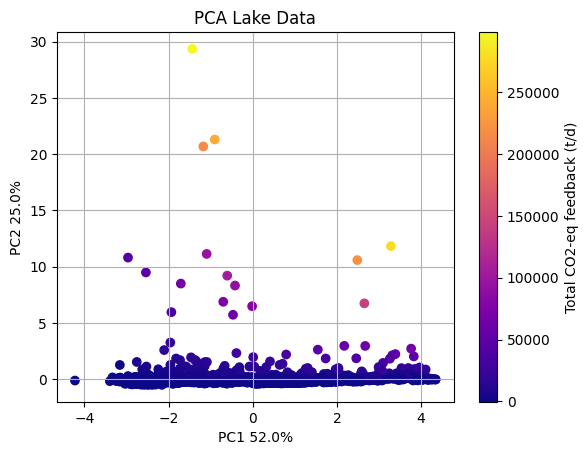

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

#Tranform Data
pca = PCA(n_components=0.99) 
PCs = pca.fit_transform(scaled_data)

#Lake Area vs Total CO2
pc1pct = str(np.round(pca.explained_variance_ratio_[0]*100))+"%"
pc2pct = str(np.round(pca.explained_variance_ratio_[1]*100))+"%"
### Ploting the PCA

fig,ax = plt.subplots()
ax.set_title('PCA Lake Data')
ax.set_xlabel("PC1 " + pc1pct) 
ax.set_ylabel("PC2 " + pc2pct)
plt.scatter(PCs[:,0], PCs[:,1], c = df_final['Total CO2-eq feedback (t/d)'], cmap="plasma")
plt.grid()
plt.colorbar(label='Total CO2-eq feedback (t/d)')
